==================================================================================


In [1]:
import pandas as pd
file_path = "./cleaned_train.csv"
data = pd.read_csv(file_path)
data.head(), data.dtypes

(       ID Customer_ID     Month             Name  Age          SSN Occupation  \
 0  0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265  Scientist   
 1  0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839    Teacher   
 2  0x1612  CUS_0x21b1       May  Rick Rothackerj   28  004-07-5839    Teacher   
 3  0x1613  CUS_0x21b1      June  Rick Rothackerj   28  004-07-5839    Teacher   
 4  0x1615  CUS_0x21b1    August  Rick Rothackerj   28  004-07-5839    Teacher   
 
    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
 0       19114.12            1824.843333                  3  ...   
 1       34847.84            3037.986667                  2  ...   
 2       34847.84            3037.986667                  2  ...   
 3       34847.84            3037.986667                  2  ...   
 4       34847.84            3037.986667                  2  ...   
 
    Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
 0            809.98  

In [2]:
import pandas as pd


# Function to remove outliers from a DataFrame
def remove_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Assuming we only want to filter numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
cleaned_data_without_outliers = remove_outliers(data)

# Save the cleaned data without outliers
cleaned_data_without_outliers.to_csv("./cleaned_train_no_outliers.csv", index = False)

data = cleaned_data_without_outliers


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# List of predictor variables
features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card','Interest_Rate' ,'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
    'Outstanding_Debt' ,'Credit_Utilization_Ratio',
    'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance'
]

# Target variable
target = 'Credit_Score_num'

# Encode the target variable since LinearRegression does not handle categorical targets
#le = LabelEncoder()
#data[target] = le.fit_transform(data[target])

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)


print(f'MSE: {mse}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

print(f'Credit_Score={round(model.intercept_,4)}', end='')
for i in range(len(features)):
  print(f" + {round(model.coef_[i],4)} × {features[i]}", end='')

MSE: 6637.722410975565
Coefficients: [ 3.09347446e-01  1.40343382e-04  3.75534052e-03 -1.17285014e+00
 -5.09121869e+00 -2.41484248e+00 -6.74690990e-01 -6.67767517e-01
 -1.37049101e-01  1.26101591e+00 -3.44414264e+00 -4.64464994e-03
 -1.14023227e-01 -2.34890730e-02 -7.07166312e-02 -5.44524508e-02]
Intercept: 760.3944050932514
Credit_Score=760.3944 + 0.3093 × Age + 0.0001 × Annual_Income + 0.0038 × Monthly_Inhand_Salary + -1.1729 × Num_Bank_Accounts + -5.0912 × Num_Credit_Card + -2.4148 × Interest_Rate + -0.6747 × Num_of_Loan + -0.6678 × Delay_from_due_date + -0.137 × Num_of_Delayed_Payment + 1.261 × Changed_Credit_Limit + -3.4441 × Num_Credit_Inquiries + -0.0046 × Outstanding_Debt + -0.114 × Credit_Utilization_Ratio + -0.0235 × Total_EMI_per_month + -0.0707 × Amount_invested_monthly + -0.0545 × Monthly_Balance

D:\Program Files\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


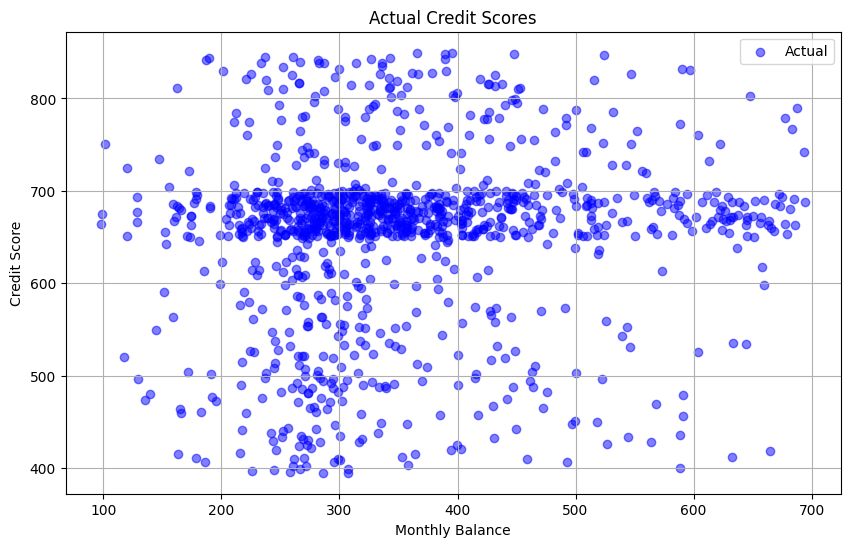

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of predicted values from minimum to maximum for visualization
x_range = np.linspace(X_test.min(), X_test.max(), len(X_test))  # Use this for multidimensional X_test

# Since we cannot easily visualize a multidimensional model, let's calculate predictions over the test set
y_range = model.predict(x_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Monthly_Balance'], y_test, color='blue', label='Actual', alpha=0.5)
#plt.scatter(X_test['Monthly_Balance'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual Credit Scores')
plt.xlabel('Monthly Balance')
plt.ylabel('Credit Score')
plt.legend()
plt.grid(True)
plt.show()


D:\Program Files\Python\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


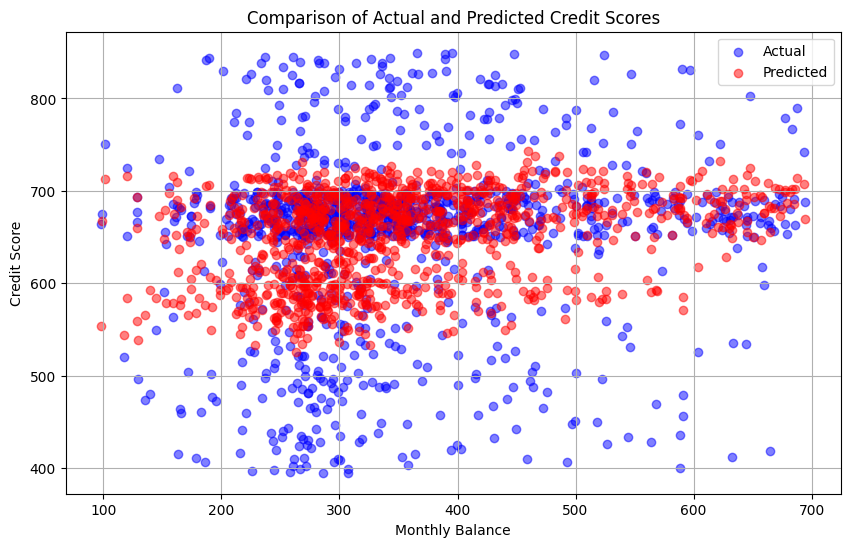

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of predicted values from minimum to maximum for visualization
x_range = np.linspace(X_test.min(), X_test.max(), len(X_test))  # Use this for multidimensional X_test

# Since we cannot easily visualize a multidimensional model, let's calculate predictions over the test set
y_range = model.predict(x_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Monthly_Balance'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['Monthly_Balance'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Comparison of Actual and Predicted Credit Scores')
plt.xlabel('Monthly Balance')
plt.ylabel('Credit Score')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_num
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,710.962384
1,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,771.714111
2,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good,776.316899
3,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good,704.961630
4,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good,789.566678
8,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard,682.036133
9,0x1627,CUS_0xb891,February,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,35.279982,17 Years and 4 Months,No,16.415452,124.881820,Low_spent_Small_value_payments,409.951812,Standard,668.269083
10,0x1628,CUS_0xb891,March,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,632.46,32.301163,17 Years and 5 Months,NM,16.415452,83.406509,High_spent_Medium_value_payments,411.427123,Standard,686.269762
11,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard,671.095272
19,0x1657,CUS_0x5407,February,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,1704.18,35.171160,14 Years and 8 Months,Yes,70.478333,38.436983,High_spent_Large_value_payments,392.196185,Poor,596.006741


In [7]:
!pip install azure.functions
!pip install marshmallow

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/175.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/175.1 kB ? eta -:--:--
     ------ ------------------------------ 30.7/175.1 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 41.0/175.1 kB

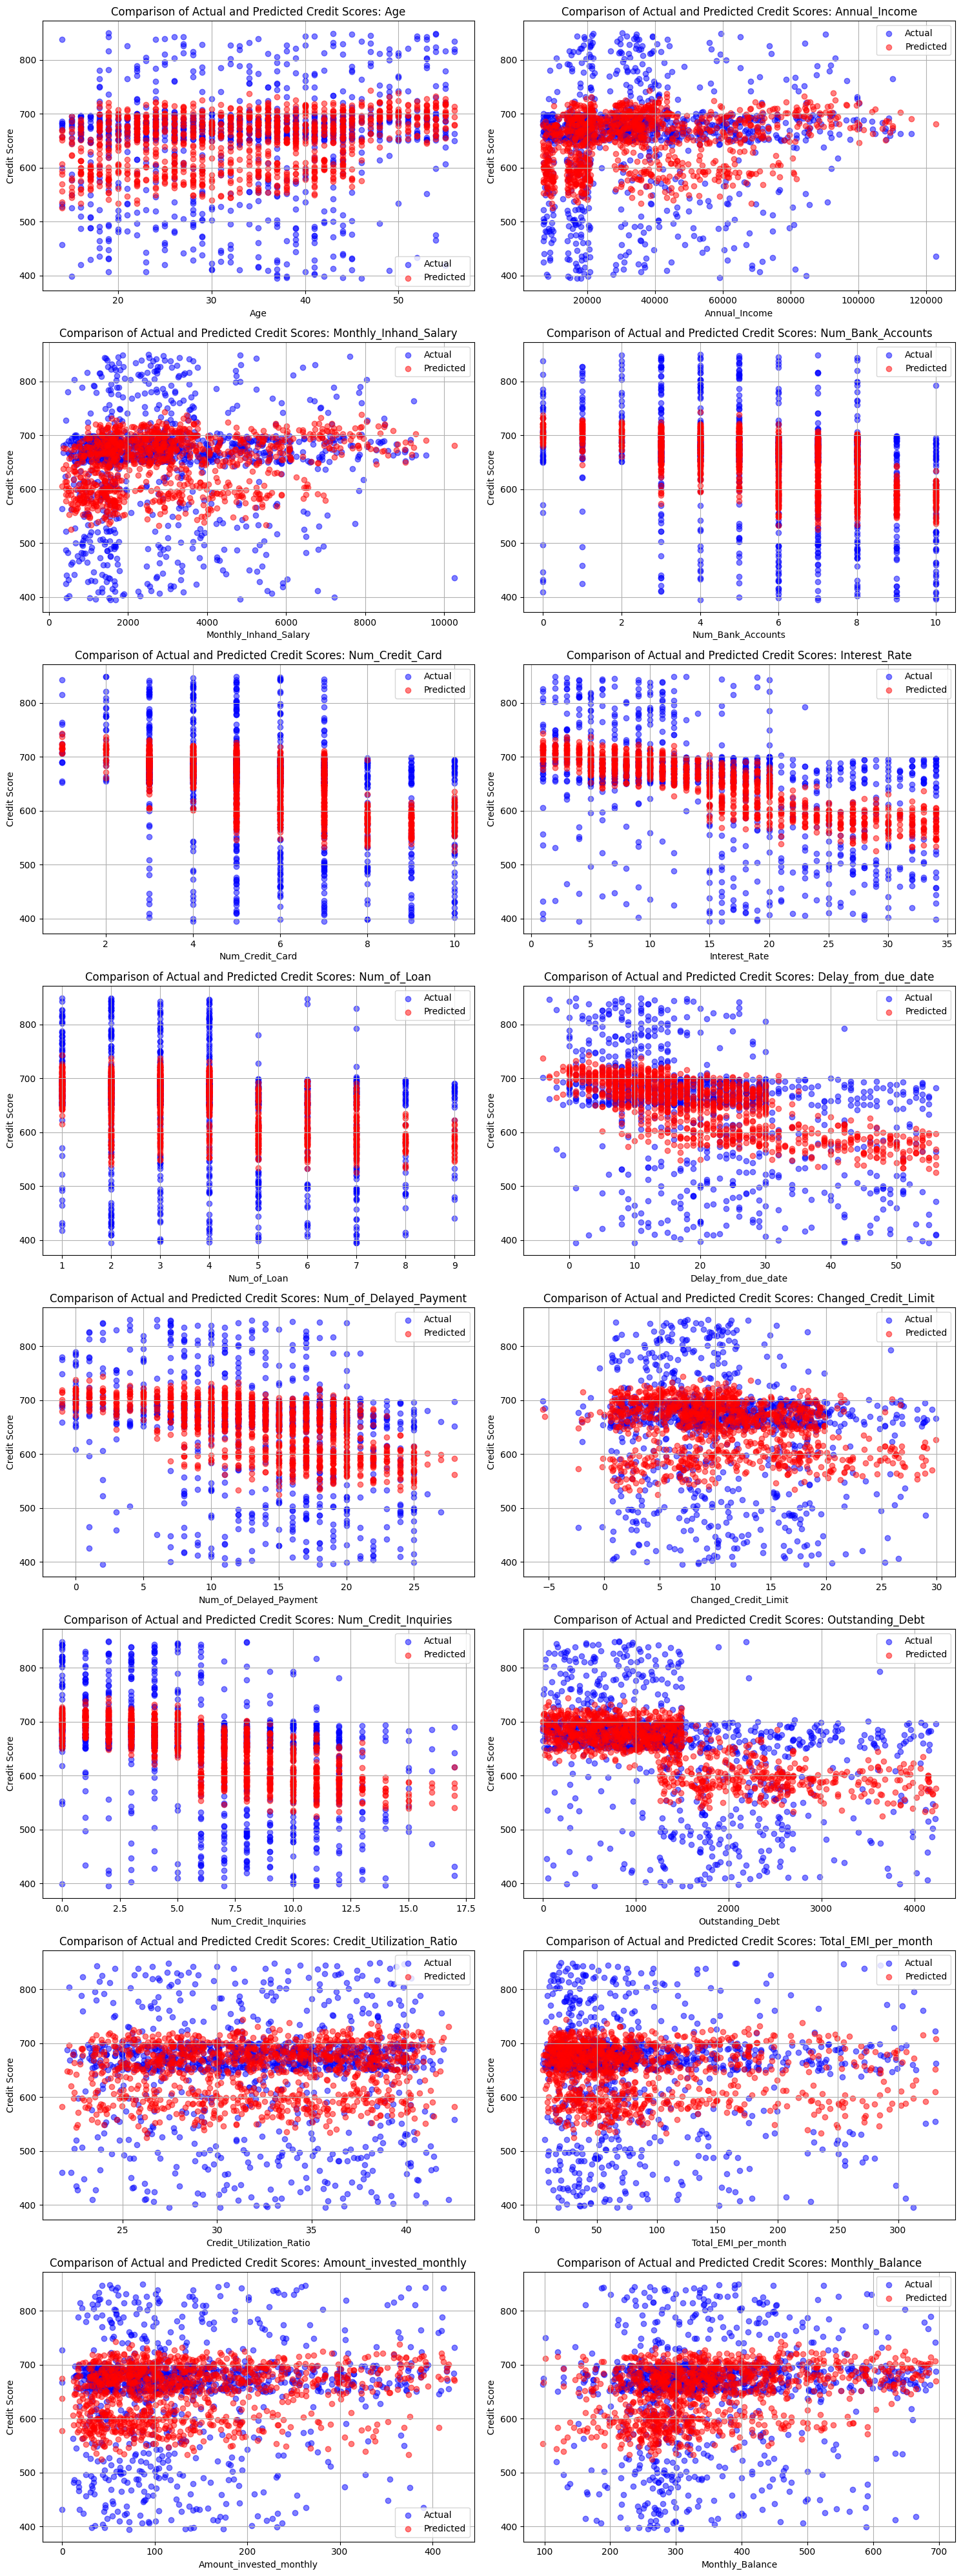

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation
# Assuming X_test is your test dataset, y_test is actual scores, y_pred is predicted scores
# X_test = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
# y_test = np.random.randn(100) * 50 + 100
# y_pred = y_test + np.random.randn(100) * 10  # some random noise added to actual scores

# Number of plots based on the number of features
num_features = X_test.shape[1]
num_rows = int(np.ceil(num_features / 2))  # arrange plots in 2 columns

plt.figure(figsize=(15, num_rows * 5))  # dynamic figure size based on number of rows

for i, feature in enumerate(X_test.columns):
    plt.subplot(num_rows, 2, i+1)  # subplot for each feature
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted', alpha=0.5)
    plt.title(f'Comparison of Actual and Predicted Credit Scores: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Credit Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
X_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
14188,42,20562.560,1651.546667,5,6,31,2,22,13,11.16,9,2491.07,29.728693,28.588769,128.822708,277.743190
35847,29,10034.725,939.227083,9,5,20,5,24,24,5.61,13,3498.63,34.850352,22.960835,44.066285,316.895588
10855,45,19547.065,1486.922083,3,2,8,3,15,12,5.14,1,824.36,25.296449,46.362559,87.254636,305.075014
8061,31,19431.830,1797.319167,3,6,8,4,22,9,11.63,3,865.23,30.088918,49.382364,37.087712,353.261841
26117,15,20417.480,1646.280978,9,5,34,8,46,26,24.53,8,2852.17,27.091794,125.227431,104.664184,227.929741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,43,32464.100,2668.341667,4,3,10,1,6,8,4.82,1,681.09,41.244240,19.186561,95.016109,402.631496
23736,39,8707.380,426.590973,4,4,23,4,14,10,16.68,8,1684.57,37.441114,48.507469,12.951352,294.226706
20566,36,8705.960,897.496667,3,7,27,3,26,15,19.19,11,2594.78,39.056039,16.446954,90.823326,272.479387
37088,30,62231.340,5006.945000,6,4,17,2,26,12,4.64,0,551.40,27.629835,58.251747,274.509396,427.933357
